In [2]:
# Download the data using Panda's DataReader() function
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Define Start/End dates, and ticker names
start = datetime.datetime(2021, 1, 1)
end = datetime.datetime(2021,12,31)

In [5]:
# Getting data for Walmart & Target
# we already define the start and end date
Walmart = data.DataReader("WMT", 'yahoo', start, end)
Target = data.DataReader("TGT", 'yahoo', start, end)
Walmart.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,146.889999,144.279999,144.300003,146.529999,10727400.0,144.236282
2021-01-05,147.070007,144.490005,146.600006,145.750000,8832700.0,143.468506
2021-01-06,148.100006,145.009995,145.089996,146.660004,7306300.0,144.364243
2021-01-07,147.759995,146.039993,147.619995,146.649994,6846000.0,144.354401
2021-01-08,147.000000,145.809998,146.880005,146.630005,8159400.0,144.334732


In [6]:
# Create the columns %-chg and Log Returns for both companies 
Walmart['%-chg'] = Walmart['Close'].pct_change()
Target['%-chg'] = Target['Close'].pct_change()

In [7]:
# You are creating a new column 
# for log returns
# you are introducing two new functions np numpy logarithmic funciton, 
# and shift() helps create new environment for calculation
# the shift will bring shift the row down only one row down if not specified 
Walmart['Log returns'] = np.log(Walmart['Close']/Walmart['Close'].shift())
Target['Log returns'] = np.log(Target['Close']/Target['Close'].shift())
Target.tail()

,High,Low,Open,Close,Volume,Adj Close,%-chg,Log returns
Date,,,,,,,,
2021-12-27,224.690002,220.860001,222.100006,224.100006,4335600.0,223.132996,0.013981,0.013884
2021-12-28,227.500000,223.639999,224.449997,224.910004,3202400.0,223.939499,0.003614,0.003608
2021-12-29,229.570007,225.369995,225.369995,227.919998,3065800.0,226.936508,0.013383,0.013294
2021-12-30,233.869995,228.800003,228.800003,231.910004,4007400.0,230.909286,0.017506,0.017355
2021-12-31,233.619995,229.220001,232.770004,231.440002,2485100.0,230.441315,-0.002027,-0.002029


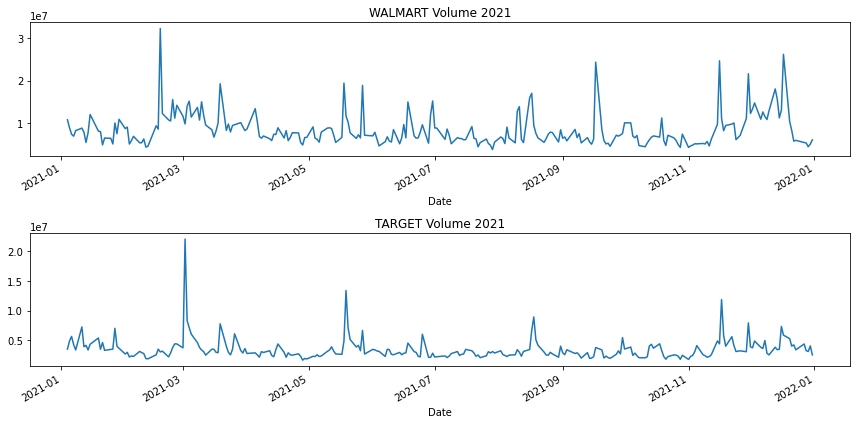

In [8]:
# create a combined plit of the volumes for both companies
# On the line righ below the plot comment on the volume of both companies 
fig, ax = plt.subplots(2)
Walmart['Volume'].loc['2021-01-01':].plot(ax=ax[0], title="WALMART Volume 2021", figsize=(12,6))
Target['Volume'].loc['2021-01-01':].plot(ax=ax[1], title="TARGET Volume 2021", figsize=(12,6))

fig.tight_layout()

In [9]:
# Walmart has the much higher volume 
# for walmart march, may, september and january have the highest volume
# while for target march, april, june, and november have the highest volume


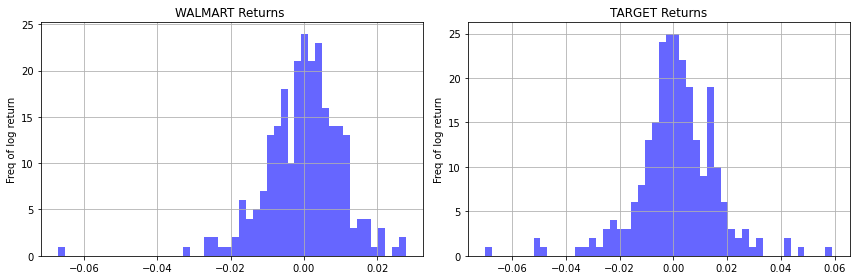

In [10]:
# create a combined plot of the log returns on boht comapnies and comment on line below
fig, ax = plt.subplots(1,2)
Walmart['Log returns'].hist(ax=ax[0], bins=50, alpha=0.6, color='b', figsize=(12,4))
ax[0].set_ylabel("Freq of log return")
ax[0].set_title("WALMART Returns ")

# Target Returns
Target['Log returns'].hist(ax=ax[1], bins=50, alpha=0.6, color='b', figsize=(12,4))
ax[1].set_ylabel("Freq of log return")
ax[1].set_title("TARGET Returns")

# use this so the charts do not overlap 
fig.tight_layout()

In [11]:
# we can see that Walmart has the most positive returns, while Target has more negatie returns 
# Target seems to be the more volitile security 


In [13]:
# calcuate the volatility for both companies and comment on how to interpret this volatility 
Walmart_volatility = Walmart['Log returns'].std()*np.sqrt(252)
Walmart_volatility

0.16773159143475252

In [12]:
Target_volatility = Target['Log returns'].std()*np.sqrt(252)
Target_volatility

0.2375584527086793

In [ ]:
# we can clearly see that Walmart has the lowest amount of volatily at 16%, while Target has 23%
# we assume that Walmart is the safer security and that Target is the riskier security given the volatility 